In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


df = pd.read_csv('newds.csv')

In [ ]:
#introucing new column to help us identify insulator or not
df['is_insulator'] = df['PBE band gap'].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
df = df.drop('PBE band gap', axis=1)  #can cause data leak

In [ ]:
print(df.isnull().sum())

functional group    0
A                   0
A_OS                0
A'                  0
A'_OS               0
A_HOMO-             0
A_HOMO+             0
A_IE-               0
A_IE+               0
A_LUMO-             0
A_LUMO+             0
A_X-                0
A_X+                0
A_Z_radii-          0
A_Z_radii+          0
A_e_affin-          0
A_e_affin+          0
Bi                  0
B_OS                0
B'                  0
B'_OS               0
B_HOMO-             0
B_HOMO+             0
B_IE-               0
B_IE+               0
B_LUMO-             0
B_LUMO+             0
B_X-                0
B_X+                0
B_Z_radii-          0
B_Z_radii+          0
B_e_affin-          0
B_e_affin+          0
μ                   0
μĀ                  0
μ𝐵 ̅                0
t                   0
is_insulator        0
dtype: int64


In [ ]:
label_encoders = {}

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
X = df.drop('is_insulator', axis=1)  # Features
y = df['is_insulator']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# classification model tarining starts here with decesion tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform cross-validation to check for overfitting
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.85818182 0.87864078 0.87014563 0.87257282 0.88834951]
Mean cross-validation score: 0.8735781112091792


Decision Tree Accuracy: 0.8612997090203686
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       693
           1       0.80      0.78      0.79       338

    accuracy                           0.86      1031
   macro avg       0.84      0.84      0.84      1031
weighted avg       0.86      0.86      0.86      1031



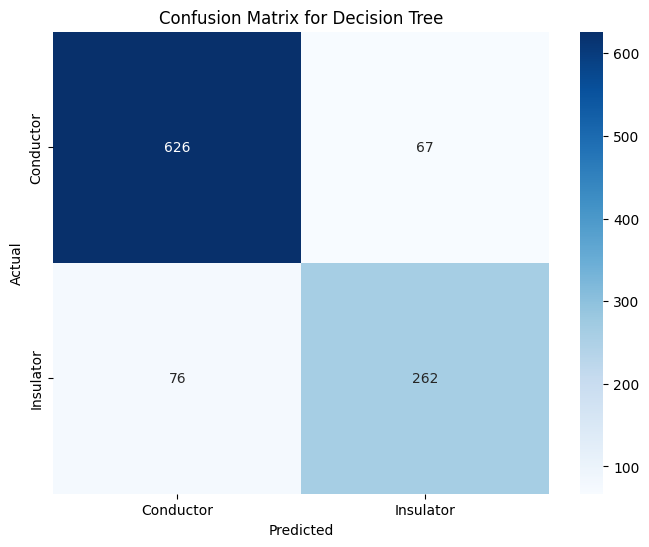

In [ ]:
dt_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_dt = dt_classifier.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_dt = dt_classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred_dt)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Conductor', 'Insulator'],
            yticklabels=['Conductor', 'Insulator'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

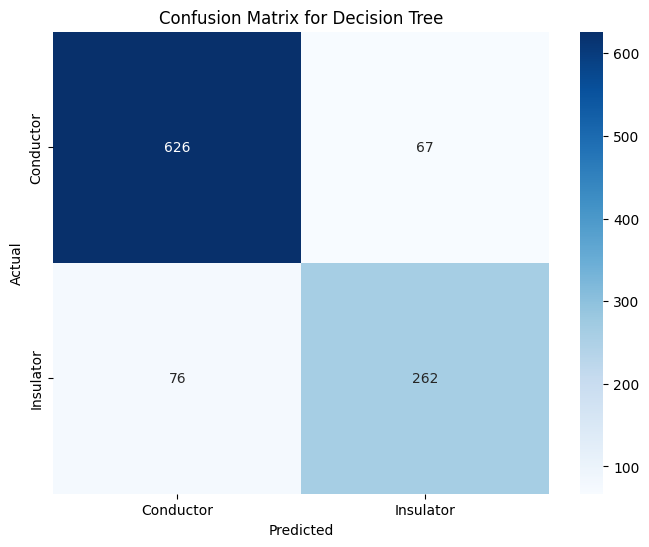

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_dt = dt_classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Conductor', 'Insulator'],
            yticklabels=['Conductor', 'Insulator'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


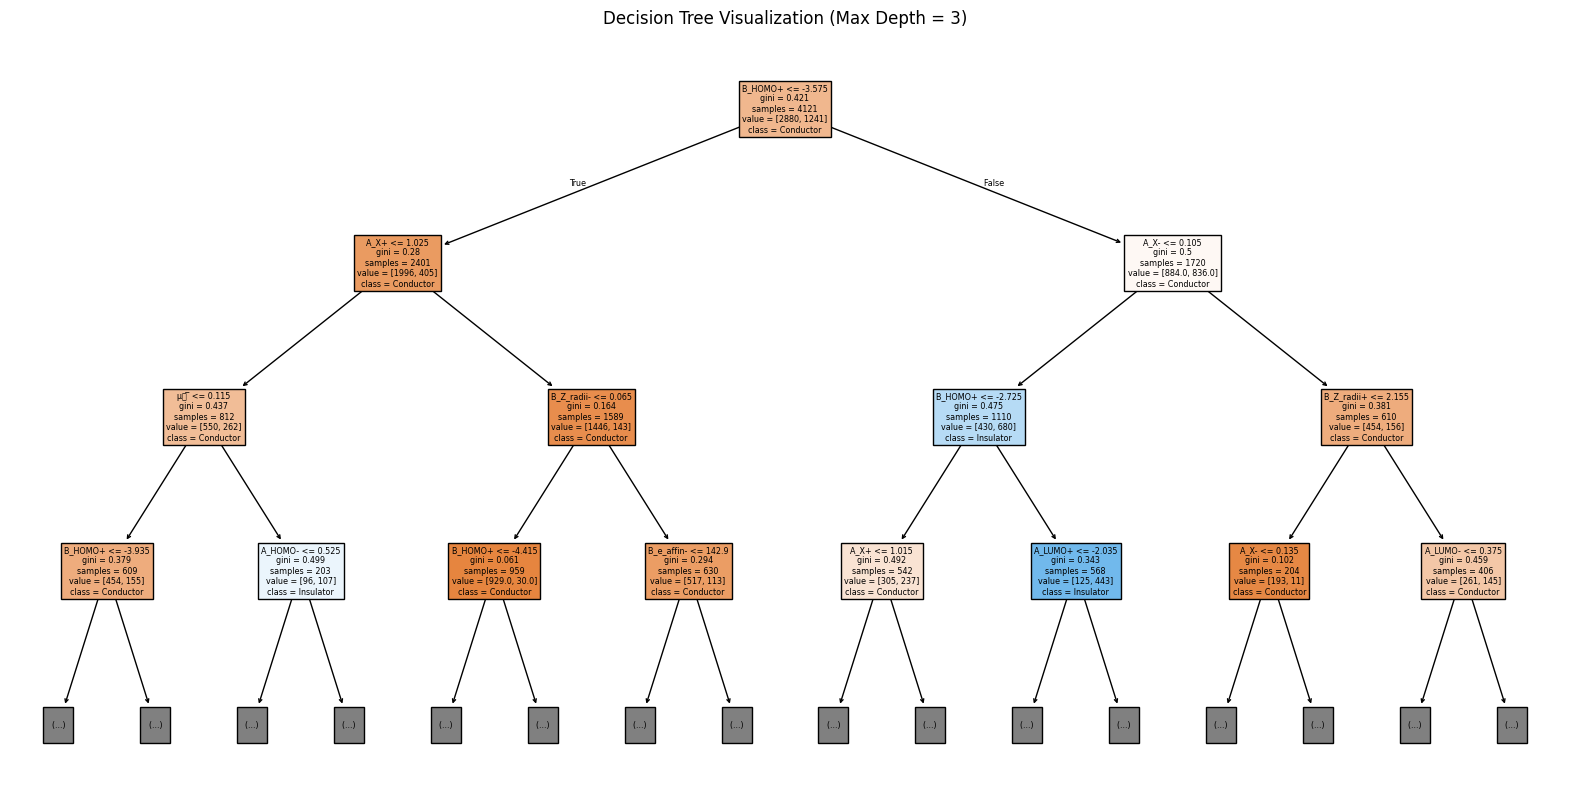

In [ ]:
from sklearn.tree import plot_tree

# Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Conductor', 'Insulator'], max_depth=3)
plt.title('Decision Tree Visualization (Max Depth = 3)')
plt.show()

In [ ]:
#XG boost starts frm here

from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')

# cross-validation to check for overfitting
cv_scores_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_xgb}")
print(f"Mean cross-validation score: {cv_scores_xgb.mean()}")


xgb_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_xgb = xgb_classifier.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Cross-validation scores: [0.92121212 0.92718447 0.93325243 0.9223301  0.92839806]
Mean cross-validation score: 0.926475433951162
XGBoost Accuracy: 0.9204655674102813
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       693
           1       0.91      0.85      0.87       338

    accuracy                           0.92      1031
   macro avg       0.92      0.90      0.91      1031
weighted avg       0.92      0.92      0.92      1031

Confusion Matrix:
 [[663  30]
 [ 52 286]]


In [ ]:
#fine tuning XGB
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')

# Define the parameter
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_xgb_classifier = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
best_xgb_classifier.fit(X_train, y_train)

y_pred_best_xgb = best_xgb_classifier.predict(X_test)
print(f"Tuned XGBoost Accuracy: {accuracy_score(y_test, y_pred_best_xgb)}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))

Best parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Tuned XGBoost Accuracy: 0.9282250242483027
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       693
           1       0.93      0.85      0.89       338

    accuracy                           0.93      1031
   macro avg       0.93      0.91      0.92      1031
weighted avg       0.93      0.93      0.93      1031

Confusion Matrix:
 [[670  23]
 [ 51 287]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


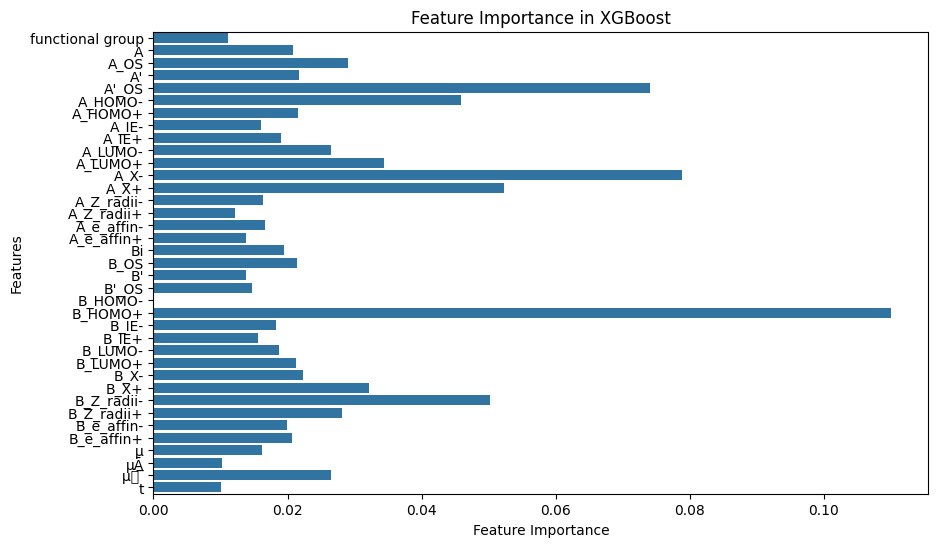

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 1️⃣ Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=best_xgb_classifier.feature_importances_, y=X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()


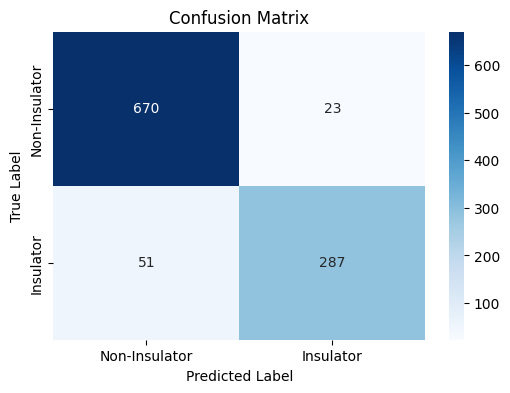

In [ ]:
# 2️⃣ Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Insulator", "Insulator"], yticklabels=["Non-Insulator", "Insulator"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import joblib

# Save the model to a file
model_filename = "tuned_classification_xgboost_mc_model1.pkl"
joblib.dump(best_xgb_classifier, model_filename)

print(f"Model saved to {model_filename}")

Model saved to tuned_classification_xgboost_mc_model1.pkl


Accuracy: 0.9282
Precision: 0.9258
Recall: 0.8491
F1-Score: 0.8858
ROC-AUC: 0.9697

Confusion Matrix:
[[670  23]
 [ 51 287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       693
           1       0.93      0.85      0.89       338

    accuracy                           0.93      1031
   macro avg       0.93      0.91      0.92      1031
weighted avg       0.93      0.93      0.93      1031



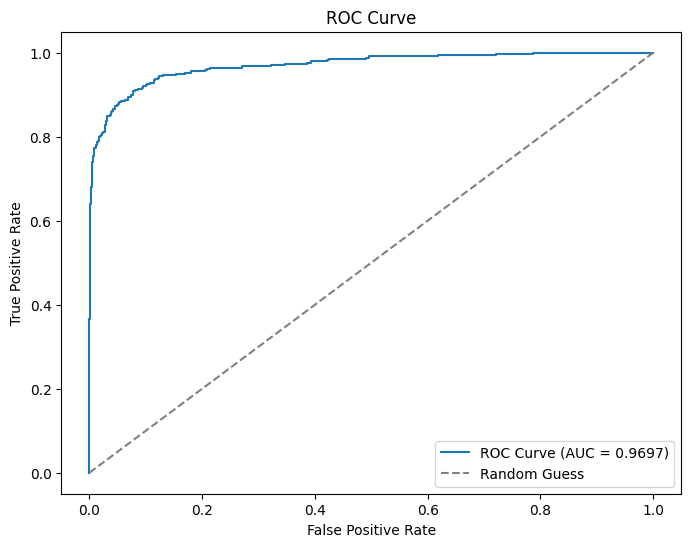

In [ ]:
import joblib
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Step 1: Load the saved model
model_filename = "tuned_classification_xgboost_mc_model1.pkl"
loaded_model = joblib.load(model_filename)


y_pred = loaded_model.predict(X_test)
y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]

#  performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
print(df.columns)

Index(['functional group', 'A', 'A_OS', 'A'', 'A'_OS', 'A_HOMO-', 'A_HOMO+',
       'A_IE-', 'A_IE+', 'A_LUMO-', 'A_LUMO+', 'A_X-', 'A_X+', 'A_Z_radii-',
       'A_Z_radii+', 'A_e_affin-', 'A_e_affin+', 'Bi', 'B_OS', 'B'', 'B'_OS',
       'B_HOMO-', 'B_HOMO+', 'B_IE-', 'B_IE+', 'B_LUMO-', 'B_LUMO+', 'B_X-',
       'B_X+', 'B_Z_radii-', 'B_Z_radii+', 'B_e_affin-', 'B_e_affin+', 'μ',
       'μĀ', 'μ𝐵 ̅', 't', 'is_insulator'],
      dtype='object')
